In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv("../input/train_3.csv",index_col=0)
data_cols=[u for u in train.columns if u.startswith('201')]
train=train[data_cols[:]]

In [3]:
weekends=(pd.Series(data_cols).astype('datetime64[ns]').dt.dayofweek // 5 == 1).values

In [4]:
val=train.values

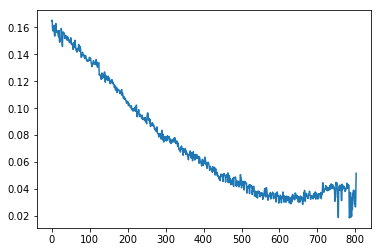

In [5]:
plt.plot((train.fillna(0)==0).values.mean(0))

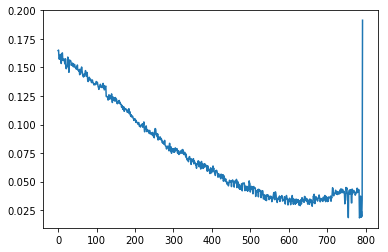

In [5]:
plt.plot((train.fillna(0)==0).values.mean(0))

In [6]:
def naorzero(X):
    return ((X==0)+np.isnan(X))>0

# weekend

In [7]:
N=49
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa=weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb=weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [8]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [9]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
679  679        0.806910       0.010540        0.215534     0.039460
680  680        0.797580       0.010540        0.219435     0.038311
681  681        0.797580       0.010540        0.219435     0.038311
682  682        0.797580       0.010540        0.219435     0.038311
683  683        0.793852       0.010685        0.222293     0.038158

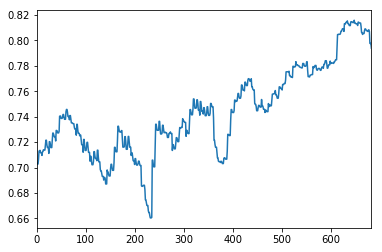

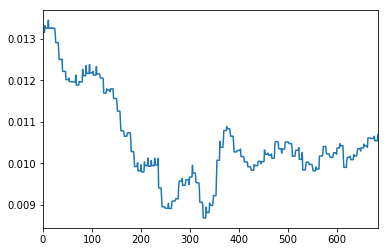

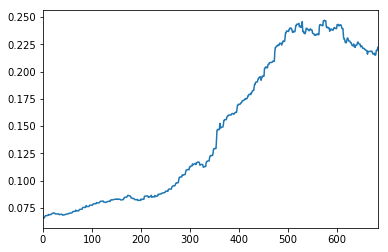

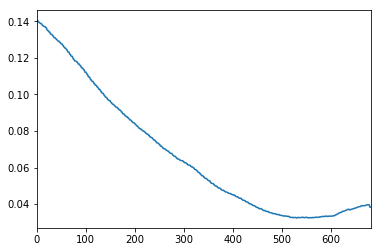

In [10]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [11]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa=weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb=weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [12]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [13]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
714  714        0.756367       0.009044        0.173360     0.039460
715  715        0.745173       0.009044        0.175920     0.038311
716  716        0.745173       0.009044        0.175920     0.038311
717  717        0.745173       0.009044        0.175920     0.038311
718  718        0.732972       0.009341        0.179424     0.038158

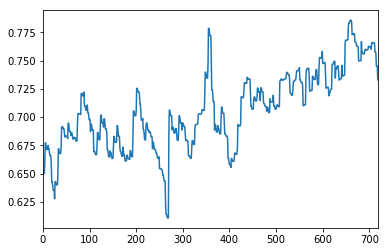

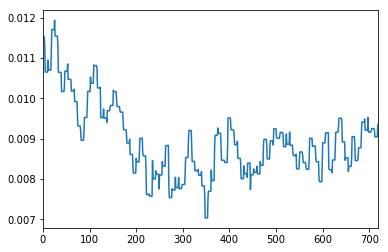

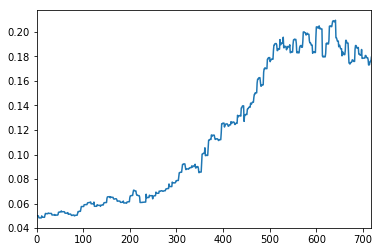

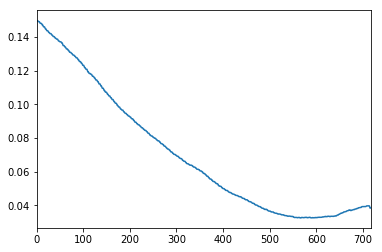

In [14]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# non-weekend

In [15]:
N=49
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa= ~weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb= ~weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [16]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [17]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
679  679        0.796332       0.011836        0.244301     0.038582
680  680        0.795808       0.011871        0.244994     0.038559
681  681        0.790479       0.011781        0.243840     0.038192
682  682        0.786398       0.011760        0.245482     0.037674
683  683        0.786049       0.011760        0.245957     0.037585

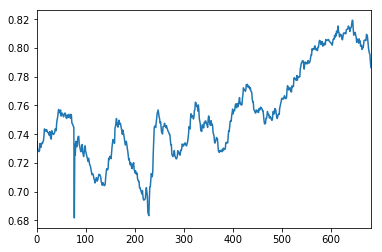

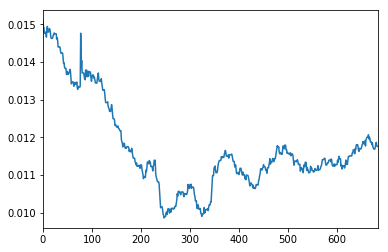

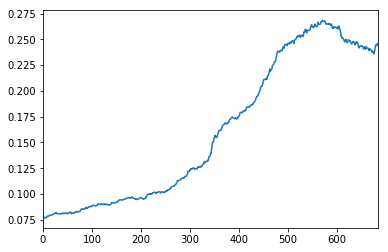

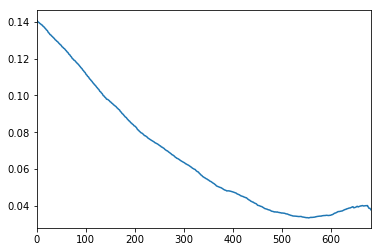

In [18]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [19]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    wa= ~weekends[i:i+N]
    a=a[:,wa]
    b=val[:,i+N+M:i+N+M+60]
    wb= ~weekends[i+N+M:i+N+M+60]
    b=b[:,wb]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


In [20]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [21]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
714  714        0.746480       0.011602        0.224472     0.038582
715  715        0.750195       0.011367        0.221161     0.038559
716  716        0.747561       0.011340        0.221966     0.038192
717  717        0.747932       0.011312        0.224579     0.037674
718  718        0.747261       0.011312        0.224912     0.037585

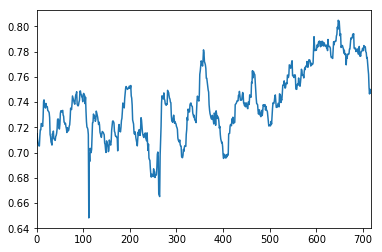

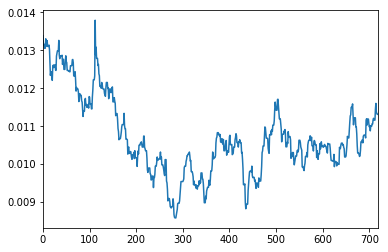

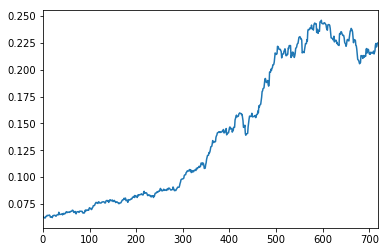

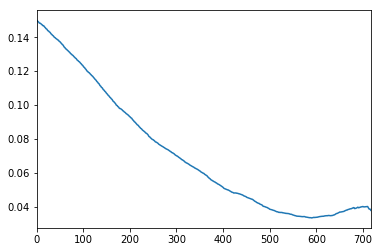

In [22]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# median

In [23]:
N=63
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [24]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [25]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
665  665        0.809391       0.011891        0.247865     0.038831
666  666        0.806777       0.011884        0.249142     0.038485
667  667        0.803848       0.011884        0.249908     0.038227
668  668        0.802025       0.011857        0.251142     0.037865
669  669        0.800270       0.011919        0.252691     0.037747

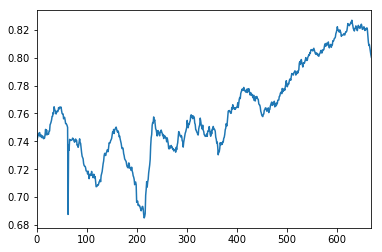

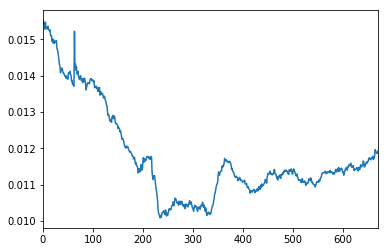

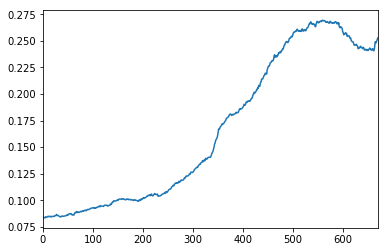

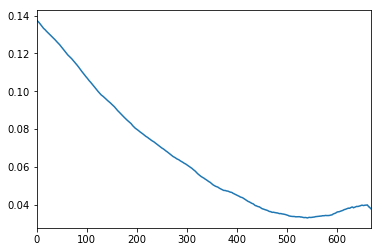

In [26]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [27]:
N=49
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [28]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [29]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
679  679        0.810207       0.011650        0.243081     0.038831
680  680        0.806825       0.011733        0.245977     0.038485
681  681        0.803820       0.011671        0.245405     0.038227
682  682        0.801066       0.011643        0.246321     0.037865
683  683        0.799183       0.011678        0.247239     0.037747

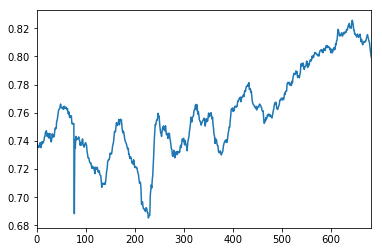

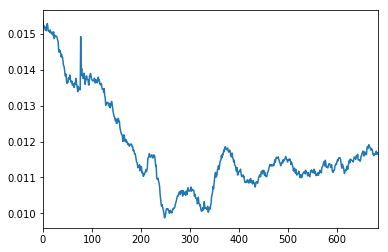

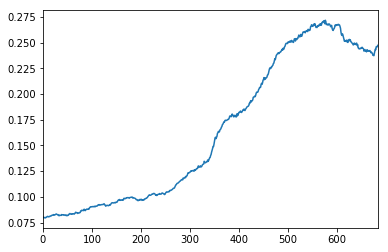

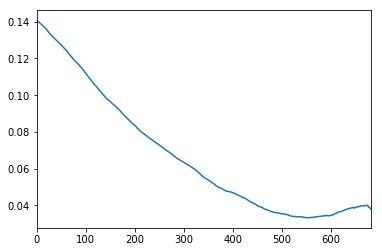

In [30]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [31]:
N=28
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [32]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [33]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
700  700        0.802364       0.011712        0.242010     0.038831
701  701        0.799132       0.011774        0.244490     0.038485
702  702        0.795426       0.011781        0.245138     0.038227
703  703        0.790218       0.011898        0.248308     0.037865
704  704        0.788557       0.011878        0.248128     0.037747

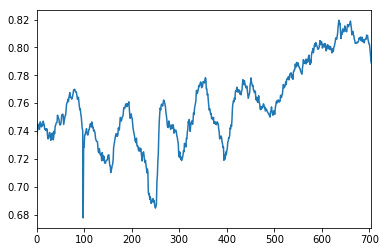

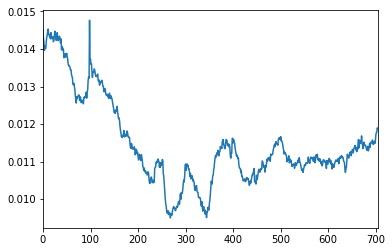

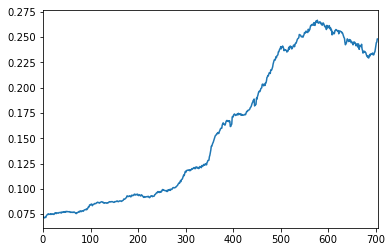

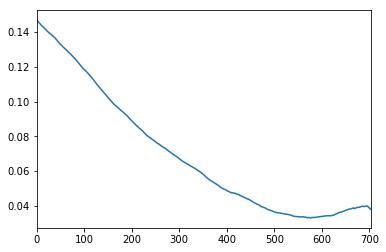

In [34]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

In [35]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmedian(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [36]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])

In [37]:
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
714  714        0.773312       0.011602        0.231050     0.038831
715  715        0.774678       0.011402        0.229516     0.038485
716  716        0.768366       0.011560        0.232364     0.038227
717  717        0.764392       0.011416        0.230452     0.037865
718  718        0.763536       0.011450        0.231610     0.037747

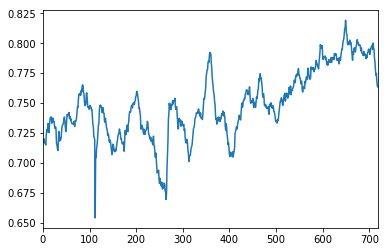

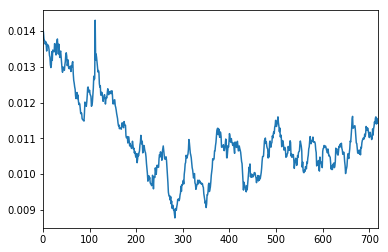

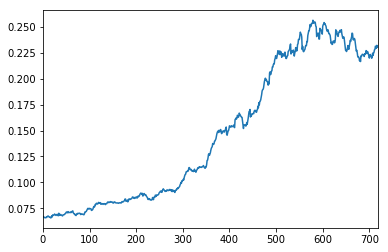

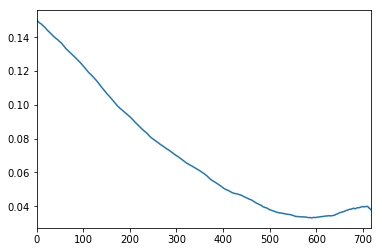

In [38]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()

# mean

In [39]:
N=14
M=0
lst=[]
for i in range(train.shape[1]-N-M-60):
    a=val[:,i:i+N]
    b=val[:,i+N+M:i+N+M+60]
    c=np.nanmean(a,1)<0.5
    d=naorzero(b[c,:])
    x=naorzero(b)
    #print a.shape,b.shape,np.sum(c),d.shape
    e= i, 1.0*d.sum()/np.prod(d.shape), 1.0*d.shape[0]/a.shape[0],\
        1.0*d.sum()/x.sum(),1.0*x.sum()/np.prod(b.shape)
    lst.append(e)
    #if i>3: break
    

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


In [40]:
df=pd.DataFrame(lst,columns=['day','filtered_%zero','filtered_%rec', '%filtered_zero','total_%zero'])
df.tail()

day  filtered_%zero  filtered_%rec  %filtered_zero  total_%zero
714  714        0.837913       0.008755        0.188917     0.038831
715  715        0.835307       0.008672        0.188227     0.038485
716  716        0.827600       0.008638        0.186999     0.038227
717  717        0.825260       0.008624        0.187954     0.037865
718  718        0.823162       0.008596        0.187460     0.037747

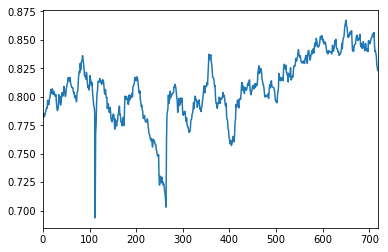

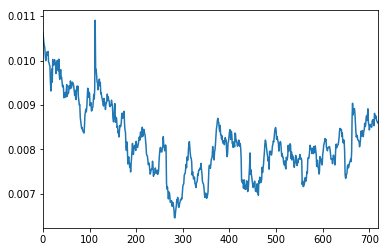

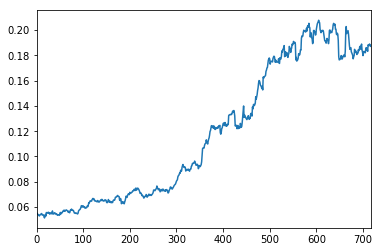

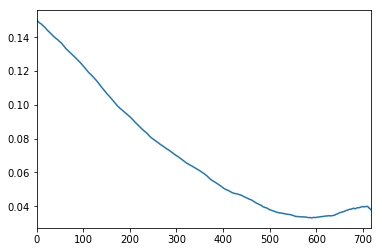

In [41]:
df.iloc[:,1].plot();plt.show()
df.iloc[:,2].plot();plt.show()
df.iloc[:,3].plot();plt.show()
df.iloc[:,4].plot();plt.show()